# Importar Librarias y datos

In [592]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np   

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [593]:
df = pd.read_parquet("output_08.parquet")

In [594]:
df.head()

,age,gender,employment_stat,wage_per_hour,working_week_per_year,occupation_code,total_employed,gains,losses,stocks_status,...,tax_status_Otro,tax_status_Single,citizenship_Native,citizenship_Otro,country_of_birth_own_US,migration_code_change_in_msa_MSA to MSA,migration_code_change_in_msa_Otro,migration_code_change_in_msa_unchanged,migration_code_change_in_reg_Otro,migration_code_change_in_reg_unchanged
0,0.853333,1.0,0.0,0.000000,1.000000,0.000000,0.333333,0.0,0.0,0.002916,...,True,False,True,False,True,False,False,False,False,False
1,0.666667,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,False,True,True,False,True,False,False,True,False,True
2,0.080000,0.0,0.0,0.050005,0.288462,0.565217,0.666667,0.0,0.0,0.000000,...,False,True,True,False,True,False,False,True,False,True
4,0.733333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,False,False,True,False,True,False,False,False,False,False
5,0.400000,0.0,0.0,0.082508,1.000000,0.673913,1.000000,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,True,False,True


# Modelo

In [596]:
df.columns

Index(['age', 'gender', 'employment_stat', 'wage_per_hour',
       'working_week_per_year', 'occupation_code', 'total_employed', 'gains',
       'losses', 'stocks_status', 'income_above_limit',
       'education_secondary_complete', 'education_secondary_incomplete',
       'education_technical_education/university_incomplete',
       'education_university_graduate_or_higher',
       'marital_status_Married-civilian spouse present',
       'marital_status_Never married', 'marital_status_Otro',
       'marital_status_Widowed', 'race_Otro', 'race_White', 'is_hispanic_Otro',
       'employment_commitment_Full-time schedules',
       'employment_commitment_Not in labor force',
       'employment_commitment_Otro',
       'industry_code_main_Manufacturing-durable goods',
       'industry_code_main_Not in universe or children',
       'industry_code_main_Otro', 'industry_code_main_Retail trade',
       'household_stat_Householder', 'household_stat_Nonfamily Householder',
       'household_stat

# Dividir para entrenar

In [598]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['income_above_limit'])  # Features
y = df['income_above_limit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train modelo

In [600]:
# Primero comenzamos con un número aleatorio para comprobar que el modelo funciona.

K = 5
knn = KNeighborsClassifier(n_neighbors=K)  # Experiment with different values of K
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"K value: {K}\nAccuracy: {accuracy_score(y_test, y_pred):.4f}\n")

K value: 5
Accuracy: 0.9241



In [601]:
# bucle for para probar diferentes valores n_neighbour

for K in range(2, 7):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    print(f"K value: {K}\nAccuracy: {accuracy_score(y_test, y_pred):.4f}\n")

K value: 2
Accuracy: 0.9250

K value: 3
Accuracy: 0.9208

K value: 4
Accuracy: 0.9265

K value: 5
Accuracy: 0.9241

K value: 6
Accuracy: 0.9281



In [602]:
# La precisión sigue aumentando. Aumente el alcance y la visualización.

accuracies = []

for K in range(2, 15):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    #print(f"K value: {K}\nAccuracy: {accuracy_score(y_test, y_pred):.4f}\n")

print(accuracies)

[0.9250383255639333, 0.9208459781622501, 0.9265400619466257, 0.9241310264993899, 0.9281356568532365, 0.9260707693270344, 0.9273847886618903, 0.9266964928198229, 0.927290930137972, 0.9268529236930201, 0.9276037918843663, 0.9272596439633326, 0.927290930137972]


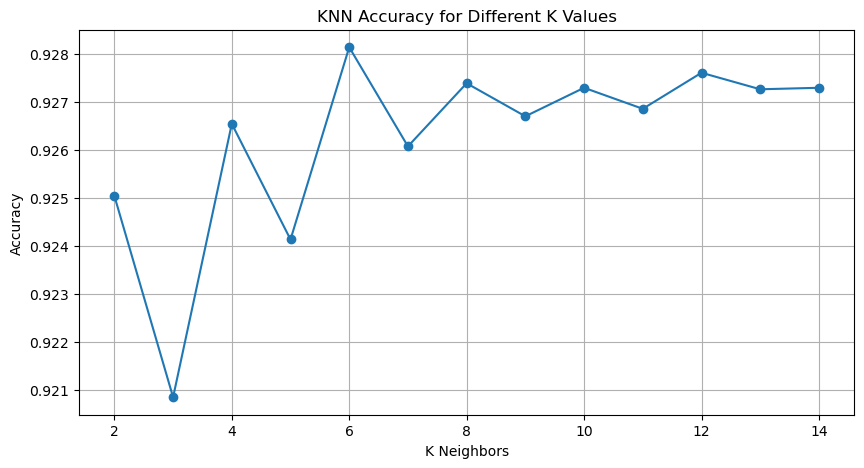

In [603]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 15), accuracies, marker='o', linestyle='-')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
#plt.xticks(k_values)
plt.grid(True)
plt.show()

## Mirando ese grafico 8 es que sale con lo mejor presicion antes de la linea se aplane.

# Resultados

In [694]:
k = 6
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"K value: {k}  Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

K value: 6  Accuracy: 0.9281


Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     29405
         1.0       0.63      0.25      0.36      2558

    accuracy                           0.93     31963
   macro avg       0.78      0.62      0.66     31963
weighted avg       0.91      0.93      0.91     31963



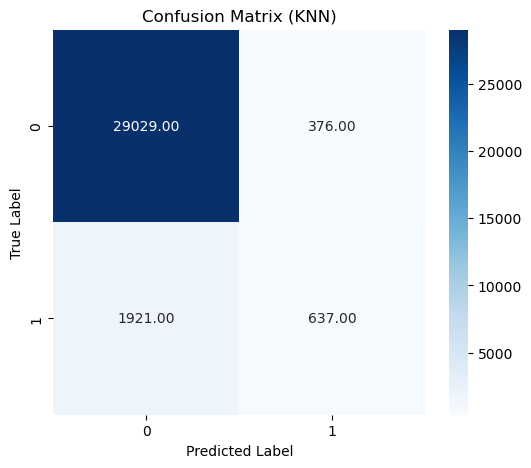

In [698]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum() * 100

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True,  fmt='.2f', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

!! needs updating !!


### 1. Buen desempeño del modelo 
- Se ha utilizado un modelo **K-Nearest Neighbors (KNN)** con **K = 8**, logrando una **precisión del 93.19%** en la clasificación.  
- La **matriz de confusión** muestra que el modelo identifica correctamente la mayoría de los casos:  
  - **90.84%** de verdaderos positivos.  
  - **2.35%** de verdaderos negativos.  
  - **5.66%** de falsos positivos.  
  - **1.16%** de falsos negativos.  
- Aunque el modelo tiene un buen desempeño general, su capacidad para detectar la clase minoritaria (ingresos altos) es limitada.  

### 2. Desbalance de clases y su impacto 
- Se observa que la **precisión para la clase mayoritaria (ingresos bajos) es muy alta (94%)**, mientras que para la clase minoritaria (ingresos altos) es **más baja (64%)**.  
- La **recall para ingresos altos es solo del 25%**, lo que indica que el modelo tiene dificultades para identificar estos casos.  
- Este desbalance puede afectar la utilidad del modelo en escenarios donde detectar ingresos altos es clave.  

### 3. Posibles mejoras 
- Considerar técnicas de **balanceo de clases**, como sobremuestreo de la clase minoritaria o submuestreo de la clase mayoritaria.  
- Explorar métodos de **ponderación de vecinos** para dar más importancia a ciertas observaciones en la clasificación.  


In [701]:
pd.DataFrame({"y_real" : y_test, "y_pred": y_pred}).groupby(["y_pred", "y_real"]).size()

y_pred  y_real
0.0     0.0       29029
        1.0        1921
1.0     0.0         376
        1.0         637
dtype: int64

In [621]:
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

accuracy = (TN + TP) / (TN + TP + FN + FP)
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)
npv_value = TN / (TN + FN) if (TN + FN) != 0 else 0

print(f"Accuracy: {accuracy}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Especificidad: {especificidad}")
print(f"Negative Predictive Value (NPV): {npv_value}")

Accuracy: 0.9273847886618903
Sensibilidad: 0.24784988272087569
Especificidad: 0.9864988947457916
Negative Predictive Value (NPV): 0.937799043062201


## Curva ROC

In [727]:
from sklearn.metrics import roc_curve

In [729]:
# con la función roc_curve automaticamente calcula los valores de
# sensibilidad y 1-especificidad para distintos thresholds
y_probs = knn.predict_proba(X_test)[:, 1]
especificidad_inv, sensibilidad, threshold = roc_curve(y_test, y_probs)

In [731]:
threshold

array([       inf, 1.        , 0.83333333, 0.66666667, 0.5       ,
       0.33333333, 0.16666667, 0.        ])

In [733]:
# Find the index of the threshold closest to 0.5
threshold_index = np.argmin(np.abs(thresholds - 0.5))

# Now print the values for that threshold
print(f"Threshold = {thresholds[threshold_index]}")
print(f"Sensibilidad = {tpr[threshold_index]}")  # Sensitivity (True Positive Rate)
print(f"Especificidad = {1 - fpr[threshold_index]}")  # Specificity = 1 - False Positive Rate


Threshold = 0.5
Sensibilidad = 0.38819390148553556
Especificidad = 0.9755483761265091


<Axes: >

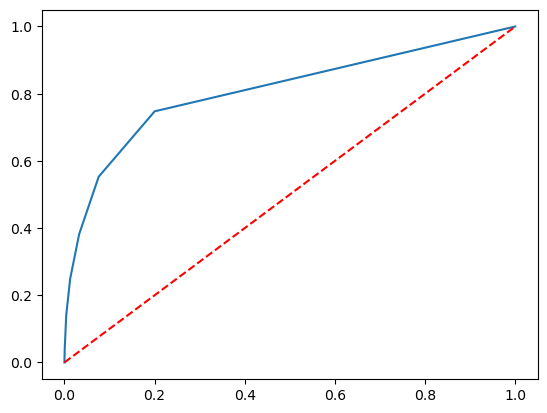

In [735]:
recta_x = [i * 0.01 for i in range(101)]
recta_y = recta_x
sns.lineplot(x = especificidad_inv, y = sensibilidad)
sns.lineplot(x = recta_x, y = recta_y, ls = "--", c = "r")

### Calcular área abajo de la curva

In [738]:
roc_auc_score(y_test, y_probs)

0.8080806400171022

# 

Class weighting

Ajustar umbral

balanced random forest
deteccion de nimolias
